In [1]:
include("../../src/NumDiffEq.jl");

In [2]:
using Plots;

In [3]:
function f!(du,u,λ,t)
    du[1] = 3*u[1]*(1 - u[1]) - u[1]*u[2] - λ*(1-exp(-5*u[1]))
    du[2] = -u[2] + 3*u[1]*u[2]
end;

In [4]:
begin
    x_ini = [[0.0,0.0],[1.0,0.0],[1/3,2.0]]
    p_ini = 0.0
    Δs= 0.001
    p_fin = 0.9
    t = 0.0
end;

In [ ]:
tiempo = @elapsed begin
    ramas_de_equilibrio = Equilibrium.(f!, x_ini, p_ini, t, Δs, p_fin)
    LBP = Limit_Points.(f!,ramas_de_equilibrio,t,p_fin)
    HBP = Hopf_Points.(f!,ramas_de_equilibrio,t,p_fin)
    estabilidad = Stability_intervals.(f!,t,ramas_de_equilibrio)
end;

In [ ]:
begin
    LBP_2D = [[(LBP[i][j][1],LBP[i][j][2][1]) for j in 1:length(LBP[i])] for i in 1:length(LBP)]
    HBP_2D = [[(HBP[i][j][1],HBP[i][j][2][1]) for j in 1:length(HBP[i])] for i in 1:length(HBP)]
    estable = [[(estabilidad[i][1][j][1],estabilidad[i][1][j][2][1]) for j in 1:length(estabilidad[i][1])] for i in 1:length(estabilidad)]
    inestable = [[(estabilidad[i][2][j][1],estabilidad[i][2][j][2][1]) for j in 1:length(estabilidad[i][2])] for i in 1:length(estabilidad)]
end;

In [ ]:
begin
    plot(title = "Predator-Prey Model \n Tiempo de ejecución = $(tiempo) s", ylabel = "Fish", xlabel = "Quota")
    plot!(estable[1], label = "Estable", linestyle = :solid, color = "blue")
    plot!(inestable[1], label = "Inestable", linestyle = :dash, color = "blue")
    scatter!(LBP_2D[1], label = "Bifurcación LP", color = "white")
    scatter!(HBP_2D[1], label = "Bifurcación Hopf", color = "red")
    ylims!(-0.1,1.0)
    xlims!(0.0,0.9)

    for i in 1:length(ramas_de_equilibrio)
    plot!(estable[i], label = "", linestyle = :solid, color = "blue")
    plot!(inestable[i], label = "", linestyle = :dash, color = "blue")
    scatter!(LBP_2D[i], label = "", color = "white")
    scatter!(HBP_2D[i], label = "", color = "red")
    end

    savefig("Predator-Prey fish.png")
end;

In [ ]:
begin
    LBP_3D = [[(LBP[i][j][2][2],LBP[i][j][1],LBP[i][j][2][1]) for j in 1:length(LBP[i])] for i in 1:length(LBP)]
    HBP_3D = [[(HBP[i][j][2][2],HBP[i][j][1],HBP[i][j][2][1]) for j in 1:length(HBP[i])] for i in 1:length(HBP)]

    plot(title = "Predator-Prey Model \n Tiempo de ejecución = $(tiempo) s", ylabel = "Quota", xlabel = "Sharks", zlabel = "Fish", camera = (60, 25))

    for i in 1:3
        x = zeros(length(ramas_de_equilibrio[i][1]))

        y_estable = zeros(length(ramas_de_equilibrio[i][1]))
        z_estable = zeros(length(ramas_de_equilibrio[i][1]))

        y_inestable = zeros(length(ramas_de_equilibrio[i][1]))
        z_inestable = zeros(length(ramas_de_equilibrio[i][1]))

        x = ramas_de_equilibrio[i][1]

        for j in 1:length(estabilidad[i][1])
            y_estable[j] = estabilidad[i][1][j][2][2]
            z_estable[j] = estabilidad[i][1][j][2][1]
        end

        for j in 1:length(estabilidad[i][2])
            y_inestable[j] = estabilidad[i][2][j][2][2]
            z_inestable[j] = estabilidad[i][2][j][2][1]
        end

        if i == 1
            plot!(y_estable,x,z_estable,xflip = true, color = "blue",linestyle = :solid, label = "Estable")
            plot!(y_inestable,x,z_inestable,xflip = true, color = "blue",linestyle = :dash, label = "Inestable")
            scatter!(LBP_3D[i], label = "Bifurcación LP", color = "white")
            scatter!(HBP_3D[i], label = "Bifurcación Hopf", color = "red")
        else
            plot!(y_estable,x,z_estable,xflip = true, color = "blue",linestyle = :solid, label = "")
            plot!(y_inestable,x,z_inestable,xflip = true, color = "blue",linestyle = :dash, label = "")
            scatter!(LBP_3D[i], label = "", color = "white")
            scatter!(HBP_3D[i], label = "", color = "red")
        end
    end


    ylims!(-0.1,1.0)
    xlims!(-0.5,2.0)
    zlims!(-0.25,1.0)
    savefig("Predator-Prey Model.png")
end

In [ ]:
begin
    #=
    for i in 1:length(x_ini)
        normas = []
        for j in 1:length(ramas_de_equilibrio[i][1])
            dx = zeros(length(x_ini))
            f!(dx,ramas_de_equilibrio[i][2][j],ramas_de_equilibrio[i][1][j],t)
            push!(normas,norm(dx))
        end
        if i == 2
            precision = plot(title = "Precisión de la rama", ylabel = "||F(u(λ),λ)||", xlabel = "λ")
            plot!(ramas_de_equilibrio[i][1],normas ,label = "λ_ini = $(p_ini), x_ini = $(x_ini[i])")
        else
            precision = plot(title = "Precisión de la rama", ylabel = "||F(u(λ),λ)|| / 1×10⁻¹⁶", xlabel = "λ")
            plot!(ramas_de_equilibrio[i][1],normas .* 1.e16 ,label = "λ_ini = $(p_ini), x_ini = $(x_ini[i])")
        end
        savefig("PrecisiónRama$(i).png")
    end
    =#
end

In [5]:
prueba = Equilibrium(f!,x_ini[3],p_ini,t,Δs,p_fin)
pb, xb = Hopf_Points(f!,prueba,t,p_fin)[1]

2-element Vector{Union{Float64, Vector{Float64}}}:
 0.671593847478832
  [0.3333333333333333, 0.3657615359771902]

In [6]:
function fp!(du,u,λ,t)
    du[1] = - 1 + exp(-5*u[1])
    du[2] = 0.0
end;

In [7]:
function G(f!,x,p,T,Δs,x0,p0,T0; orden = 20, tol = 1.e-20)
    Time, X = integracion_taylor(f!,x,0.0,T,20,1.e-20,p; Nt = 100)
    Time0, X0 = integracion_taylor(f!,x0,0.0,T,20,1.e-20,p0; Nt = 100)

    G1 = X[end] - x

    dX = [zeros(length(i)) for i in X]
    dX0 = [zeros(length(i)) for i in X0]

    for i in 1:length(Time)
        dx = zeros(length(x))
        f!(dx,X[i],p,Time[i])
        dX[i] = copy(dx)
    end

    for i in 1:length(Time0)
        dx = zeros(length(x))
        f!(dx,X0[i],p0,Time0[i])
        dX0[i] = copy(dx)
    end

    G2 = 0.0

    for i in 2:length(Time)

        G2 += 0.5*(Time[i]*Time[i-1])*((X[i-1] ⋅ dX0[i-1]) + (X[i] ⋅ dX0[i]))

    end

    #G3 = (x-x0) ⋅ x_s + (T - T0)*T_s + (p-p0)*p_s - Δs

    return [G1;G2]

end

G (generic function with 1 method)

In [11]:
n = length(xb)
Jx = zeros(n,n)
Jp = zeros(n)
F0 = zeros(n)
s = Taylor1(2)
r = Taylor1([0.0,0.0],2)

 0.0 + 𝒪(t³)

In [12]:
x = xb
p = pb
t = 0.0

0.0

In [13]:
for i in 1:n
    for j in 1:n
        dx = [s for i in 1:n]
        f!(dx,x+[j == k ? s : r for k in 1:n],p + r, t + r)
        Jx[i,j] = derivative(dx[i])(0.0)
    end
end

In [14]:
for i in 1:n
    dx = [s for i in 1:n]
    f!(dx,x .+ r,p + s,t + r)
    Jp[i] = derivative(dx[i])(0.0)
end

In [15]:
T = 2*π / abs(imag(eigvals(Jx)[1]))

10.389169984202026

In [16]:
G(f!,xb,pb + 0.001 ,T + 0.001,0.001,xb,pb,T)

3-element Vector{Float64}:
 2.763893667473427e-5
 1.8426030182872033e-5
 0.0

In [80]:
h = (1.e-16)^(1/3) * norm(pb)

3.1172625031807922e-6

In [85]:
x = xb
p = pb + 0.0001

0.671693847478832

In [86]:
typeof(1.0) == Float64

true

In [90]:
function g!(dx,x,p,t)
    f!(dx,x,p,t)
    dx[1] = T*dx[1]
    dx[2] = T*dx[2]
end

g! (generic function with 1 method)

In [91]:
function gp!(dx,x,p,t)
    if typeof(p) == Float64
        h = (1.e-16)^(1/3) * norm(p)
    else
        h = (1.e-16)^(1/3) * norm(p(0.0))
    end
    dx_b = copy(x)
    g!(dx_b,x,p-h,t)
    dx_f = copy(x)
    g!(dx_f,x,p+h,t)
    
    dx .= (dx_f - dx_b) / (2*h)
    
end

gp! (generic function with 1 method)

In [100]:
dx0 = zeros(2)
g!(dx0,xb,pb,0.0)

dx0

2-element Vector{Float64}:
 0.0
 0.0

In [101]:
function g2x!(dx,x,p,t)
    f!(dx,x,p,t)
    dx .= copy(sum([dx[i]*dx0[i] for i in 1:length(dx0)]) ./ dx)
end

g2x! (generic function with 1 method)

In [108]:
function gp!(dx::Vector{Taylor1},x::Vector{Taylor1},p,t)
    s = Taylor1(2)
    r = Taylor1([0.0,0.0],2)
    g!(dx,x(0.0)+r,p+s,t+r)
    dx = copy(derivative.(dx)(0.0))
end

gp! (generic function with 2 methods)

In [116]:
function gx!(dx::Vector{Taylor1{Float64}},x::Vector{Taylor1{Float64}},p,t)
    r = Taylor1([0.0,0.0],2)
    g!(dx,x,p+r,t+r)
    dx = copy(derivative.(dx)(0.0))
end

gx! (generic function with 2 methods)

In [117]:
Time, X = integracion_taylor(g!,x,0.0,1.0,20,1.e-20,p; Nt = 100)
Time, Jp = integracion_taylor(gp!,x,0.0,1.0,20,1.e-20,p; Nt = 100)
Time, Jx = integracion_taylor(gx!,x,0.0,1.0,20,1.e-20,p; Nt = 100)

(0.0:0.01:1.0, [[0.3333333333333333, 0.3657615359771902], [0.3333249064322274, 0.3657610565947433], [0.3333165128603363, 0.3657596165632643], [0.3333081857615634, 0.36575722253466453], [0.3332999580150106, 0.3657538839870172], [0.3332918621048657, 0.36574961413467444], [0.33328393018497304, 0.3657444289946312], [0.33327619298930783, 0.36573835172282515], [0.3332686816355733, 0.36573140372466567], [0.33326142557786376, 0.36572361336677617]  …  [0.3334050823390197, 0.3657240678654014], [0.33339781024407456, 0.3657318400216603], [0.3333902834864484, 0.3657387680503754], [0.3333825318078753, 0.3657448245401181], [0.3333745858368745, 0.3657499855280735], [0.33336647696748883, 0.36575423059518236], [0.3333582372350348, 0.3657575429471674], [0.3333498991893595, 0.3657599094811185], [0.33334149576610833, 0.3657613208373712], [0.3333330601565162, 0.3657617714364717]])

In [103]:
dx = zeros(2)
g2x!(dx,x,p,0.0)
integracion_taylor(g2x!,x,0.0,1.0,20,1.e-20,p; Nt = 100)

LoadError: ArgumentError: Division does not define a Taylor1 polynomial;
order k=20 => coeff[20]=NaN.

In [98]:
Time, X = integracion_taylor(g!,x,0.0,1.0,20,1.e-20,p; Nt = 100)
Time, Jp = integracion_taylor(gp!,x,0.0,1.0,20,1.e-20,p; Nt = 100)
Jx = [zeros(2,2) for i in Time]
for i in 1:length(Time)
    dx = zeros(2)
    f!(dx,X[i],p,Time[i])
    for j in 1:2
        for k in 1:2
            J[i][j,k] = dx[j]/dx[k]
        end
    end
end

Time, JT = integracion_taylor(f!,x,0.0,1.0,20,1.e-20,p; Nt = 100);

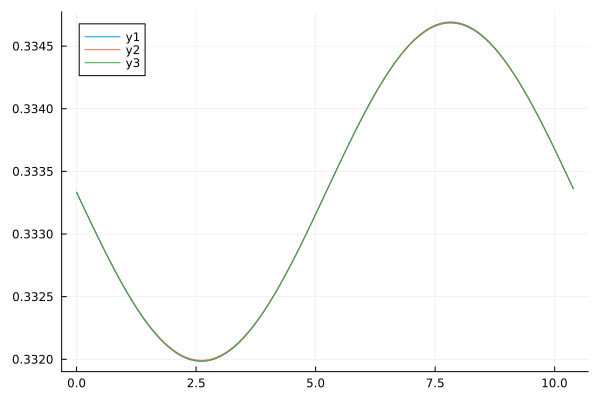

In [71]:
plot(Time, [[i[1] for i in X],[i[1] for i in Xb],[i[1] for i in Xf]])

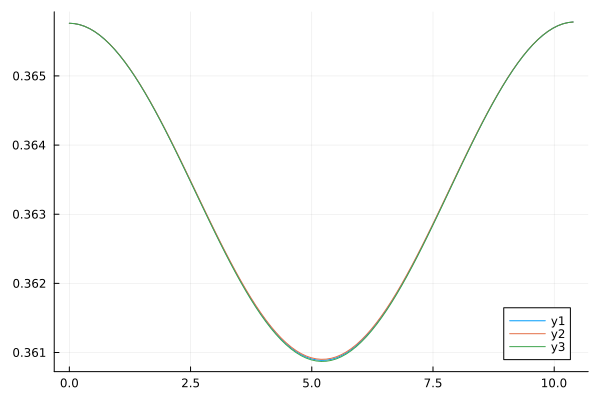

In [72]:
plot(Time, [[i[2] for i in X],[i[2] for i in Xb],[i[2] for i in Xf]])

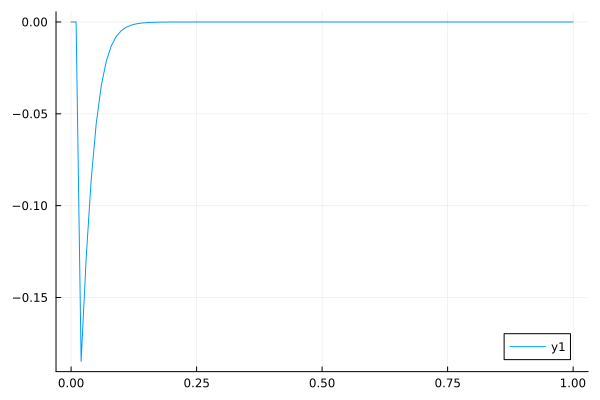

In [111]:
plot(Time,[i[1]-x[1] for i in X2] .- [i[1]-x[1] for i in Jp])

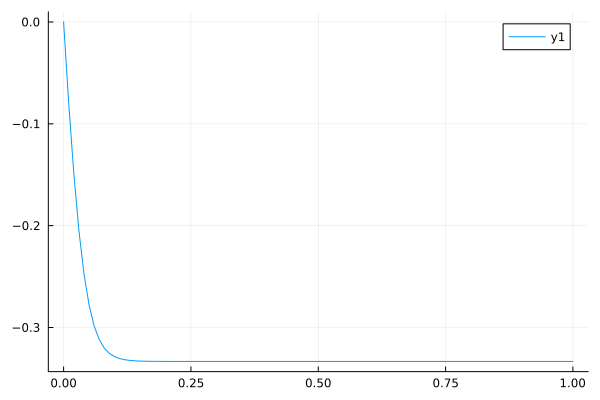

In [113]:
plot(Time,[i[1]-x[1] for i in Jp])

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*